# Models Review


| Name | Description | Loss Function |
:---------|:---------|:--------------|
| EmoteAI0901 | Convolutional layers and 1 Dense layer - 9,665,168 trainable params | Categorical Crossentropy |
| EmoteAI0901Focal200 | Convolutional layers and 1 Dense layer - 9,062,791 trainable params | Categorical Focal Crossentropy |
| EmoteAI0901W200 | Convolutional layers and 1 Dense layer - 9,062,791 trainable params | Categorical Crossentropy  and Weighted Classes |
| EmoteAI0901Focal200W | Convolutional layers and 1 Dense layer - 9,062,791 trainable params | Categorical Focal Crossentropy  and Weighted Classes |
| EmoteAI0905Focal200 | Convolutional layers (First layer with 1,024 filters) and 1 Dense layer - 19,742,983 trainable params | Categorical Focal Crossentropy |
| ResNet50 | Model pretrained based on He K. et al 2015. Layers 143 to end were re-trained | Categorical Focal Crossentropy |


In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as K


In [3]:
# img_train = '/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/train'
img_train = "train"


traindataset = K.utils.image_dataset_from_directory(img_train,
                                                    label_mode='categorical',
                                                    color_mode='grayscale',
                                                    batch_size=32,
                                                    image_size=(48,48),
                                                    seed=7,
                                                    )

# img_test = '/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/test'
img_test = "test"

testdataset = K.utils.image_dataset_from_directory(img_test,
                                                    label_mode='categorical',
                                                    color_mode='grayscale',
                                                    batch_size=32,
                                                    image_size=(48,48),
                                                    seed=7,
                                                    )


Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [4]:
class_names = {i: x for i, x in enumerate(traindataset.class_names)}
print(class_names)
emotions = traindataset.class_names
emotions.append('total')

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [5]:
# Images from 1 to 3 channels

def convert_to_rgb(image, label):
    image_rgb = tf.repeat(image, repeats=3, axis=-1)
    return image_rgb, label


traindataset = traindataset.map(convert_to_rgb)
testdataset = testdataset.map(convert_to_rgb)

In [6]:
for_pd = {'model': [], 'emotion': [], 'num_tests': [], 'test_acc': []}

# EmoteAI0901
---

In [7]:
emote01 = K.models.load_model('EmoteAI0901.h5')

In [8]:
true_emote01 = []
pred_emote01 = []

for x, y in testdataset:
    predictions = emote01.predict(x)
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y.numpy(), axis=1)

    pred_emote01.extend(pred_classes)
    true_emote01.extend(true_classes)


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 435ms/step


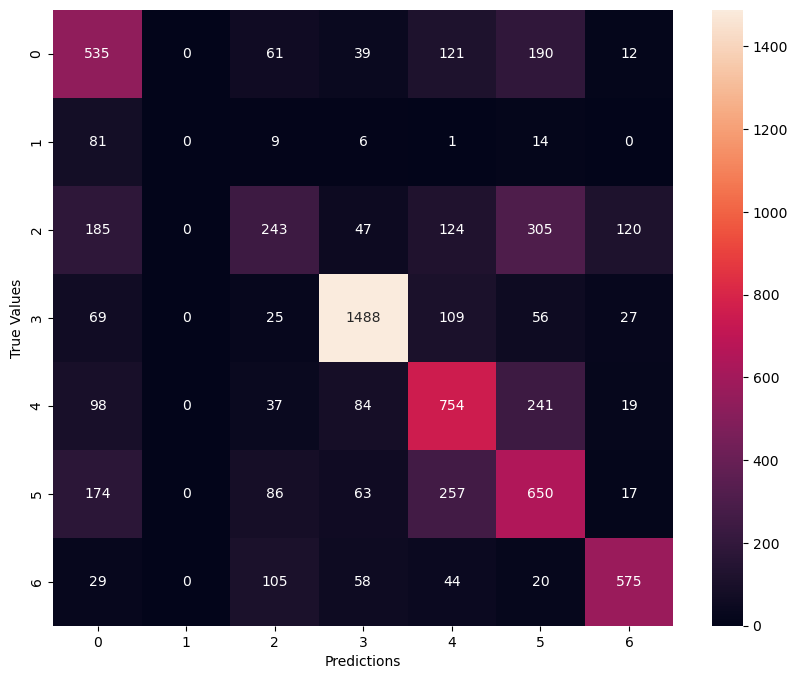

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [9]:
cm_emote01 = confusion_matrix(true_emote01, pred_emote01)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_emote01, annot=True, fmt='g')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.show()
print(class_names)

In [12]:
ac_emote01 = accuracy_score(true_emote01, pred_emote01)
pres_emote01 = np.diagonal(cm_emote01) / np.sum(cm_emote01, axis=1)
pres_emote01= list(pres_emote01)
pres_emote01.append(ac_emote01)
f1_emote01 = f1_score(true_emote01, pred_emote01, average=None)
num_tests_emote01 = list(np.sum(cm_emote01, axis=1))
num_tests_emote01.append(np.sum(cm_emote01))
print(ac_emote01)
print(pres_emote01)
print(f1_emote01)
print(num_tests_emote01)

0.5913903594315966
[0.558455114822547, 0.0, 0.2373046875, 0.8387824126268321, 0.6115166261151662, 0.5212510024057738, 0.6919374247894103, 0.5913903594315966]
[0.50258337 0.         0.30566038 0.83618994 0.57056375 0.47741462
 0.71830106]
[958, 111, 1024, 1774, 1233, 1247, 831, 7178]


In [13]:
for i in range(8):
    for_pd['model'].append('01cross')
    for_pd['emotion'].append(emotions[i])
    for_pd['num_tests'].append(num_tests_emote01[i])
    for_pd['test_acc'].append(pres_emote01[i])

# EmoteAI0901Focal200
---

In [14]:
emote01f = K.models.load_model('EmoteAI0901Focal200.h5')

In [15]:
true_emote01f = []
pred_emote01f = []

for x, y in testdataset:
    predictions = emote01f.predict(x)
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y.numpy(), axis=1)

    pred_emote01f.extend(pred_classes)
    true_emote01f.extend(true_classes)


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 90ms/step


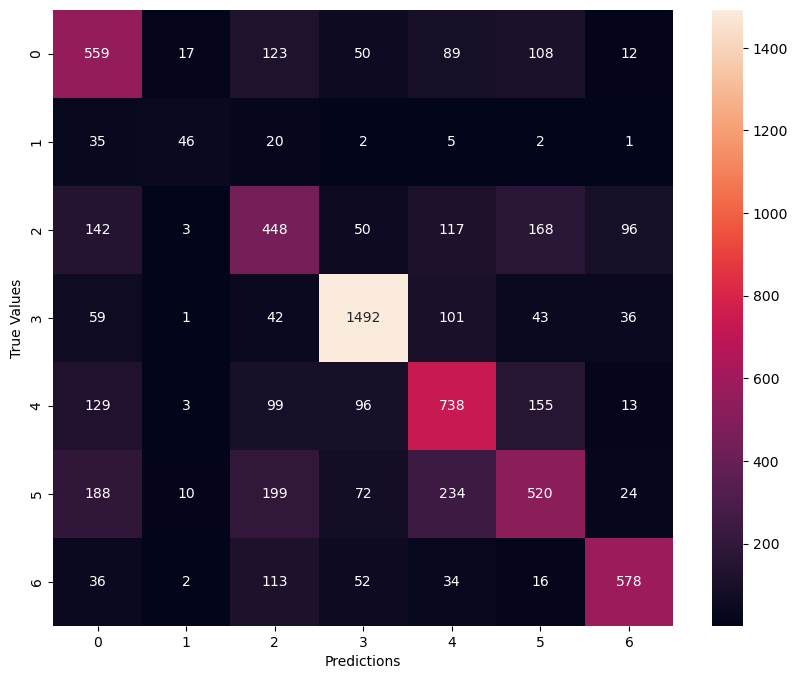

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [16]:
cm_emote01f = confusion_matrix(true_emote01f, pred_emote01f)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_emote01f, annot=True, fmt='g')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.show()
print(class_names)

In [17]:
ac_emote01f = accuracy_score(true_emote01f, pred_emote01f)
pres_emote01f = np.diagonal(cm_emote01f) / np.sum(cm_emote01f, axis=1)
pres_emote01f= list(pres_emote01f)
pres_emote01f.append(ac_emote01f)
f1_emote01f = f1_score(true_emote01f, pred_emote01f, average=None)
num_tests_emote01f = list(np.sum(cm_emote01f, axis=1))
num_tests_emote01f.append(np.sum(cm_emote01f))
print(ac_emote01f)
print(pres_emote01f)
print(f1_emote01f)
print(num_tests_emote01f)

0.6103371412649763
[0.5835073068893528, 0.4144144144144144, 0.4375, 0.8410372040586246, 0.5985401459854015, 0.4170008019246191, 0.6955475330926595, 0.6103371412649763]
[0.5308642  0.47668394 0.43326886 0.83166109 0.57859663 0.4603807
 0.72658705]
[958, 111, 1024, 1774, 1233, 1247, 831, 7178]


In [18]:
for i in range(8):
    for_pd['model'].append('01Focal200')
    for_pd['emotion'].append(emotions[i])
    for_pd['num_tests'].append(num_tests_emote01f[i])
    for_pd['test_acc'].append(pres_emote01f[i])

# EmoteAI0901W200
---

In [19]:
emote01w = K.models.load_model('EmoteAI0901W200.h5')

In [20]:
true_emote01w = []
pred_emote01w = []

for x, y in testdataset:
    predictions = emote01w.predict(x)
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y.numpy(), axis=1)

    pred_emote01w.extend(pred_classes)
    true_emote01w.extend(true_classes)


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 91ms/step


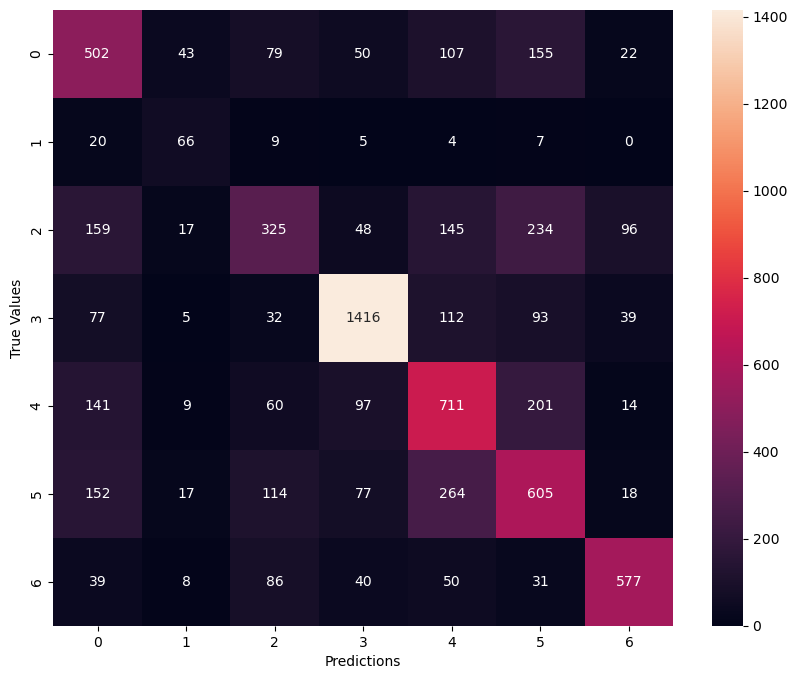

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [21]:
cm_emote01w = confusion_matrix(true_emote01w, pred_emote01w)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_emote01w, annot=True, fmt='g')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.show()
print(class_names)

In [22]:
ac_emote01w = accuracy_score(true_emote01w, pred_emote01w)
pres_emote01w = np.diagonal(cm_emote01w) / np.sum(cm_emote01w, axis=1)
pres_emote01w = list(pres_emote01w)
pres_emote01w.append(ac_emote01w)
f1_emote01w = f1_score(true_emote01w, pred_emote01w, average=None)
num_tests_emote01w = list(np.sum(cm_emote01w, axis=1))
num_tests_emote01w.append(np.sum(cm_emote01w))
print(ac_emote01w)
print(pres_emote01w)
print(f1_emote01w)
print(num_tests_emote01w)

0.5853998328225133
[0.524008350730689, 0.5945945945945946, 0.3173828125, 0.798196166854566, 0.5766423357664233, 0.48516439454691257, 0.694344163658243, 0.5853998328225133]
[0.49023438 0.47826087 0.37593985 0.8075278  0.541508   0.47026817
 0.72260488]
[958, 111, 1024, 1774, 1233, 1247, 831, 7178]


In [23]:
for i in range(8):
    for_pd['model'].append('01W200')
    for_pd['emotion'].append(emotions[i])
    for_pd['num_tests'].append(num_tests_emote01w[i])
    for_pd['test_acc'].append(pres_emote01w[i])

# EmoteAI0901Focal200W

In [24]:
emote01fw = K.models.load_model('EmoteAI0901Focal200W.h5')

In [25]:
true_emote01fw = []
pred_emote01fw = []

for x, y in testdataset:
    predictions = emote01fw.predict(x)
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y.numpy(), axis=1)

    pred_emote01fw.extend(pred_classes)
    true_emote01fw.extend(true_classes)


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 87ms/step


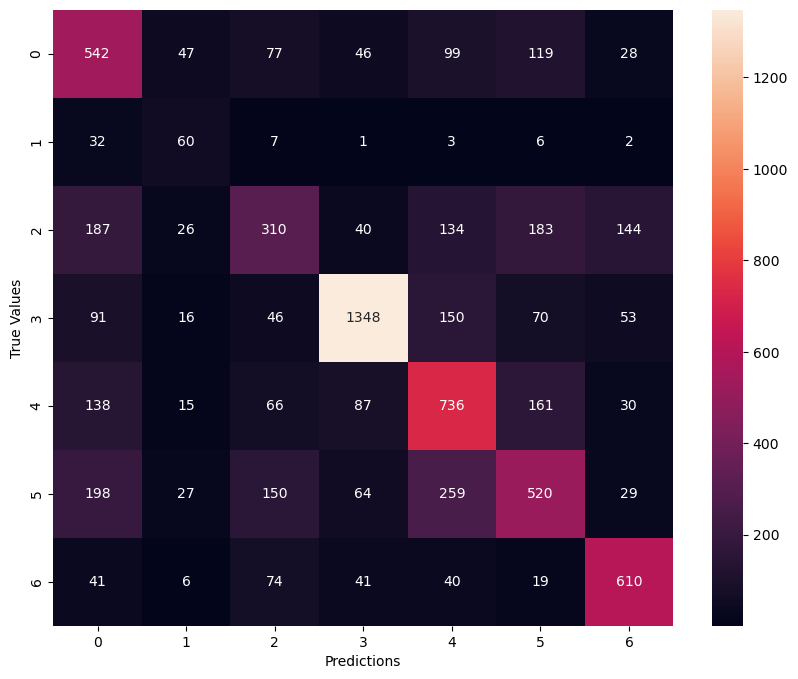

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [26]:
cm_emote01fw = confusion_matrix(true_emote01fw, pred_emote01fw)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_emote01fw, annot=True, fmt='g')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.show()
print(class_names)

In [27]:
ac_emote01fw = accuracy_score(true_emote01fw, pred_emote01fw)
pres_emote01fw = np.diagonal(cm_emote01fw) / np.sum(cm_emote01fw, axis=1)
pres_emote01fw = list(pres_emote01fw)
pres_emote01fw.append(ac_emote01fw)
f1_emote01fw = f1_score(true_emote01fw, pred_emote01fw, average=None)
num_tests_emote01fw = list(np.sum(cm_emote01fw, axis=1))
num_tests_emote01fw.append(np.sum(cm_emote01fw))
print(ac_emote01fw)
print(pres_emote01fw)
print(f1_emote01fw)
print(num_tests_emote01fw)

0.5748119253273892
[0.5657620041753654, 0.5405405405405406, 0.302734375, 0.7598647125140925, 0.5969180859691808, 0.4170008019246191, 0.7340553549939831, 0.5748119253273892]
[0.49565615 0.38961039 0.35347777 0.79270803 0.55463451 0.44731183
 0.70642733]
[958, 111, 1024, 1774, 1233, 1247, 831, 7178]


In [28]:
for i in range(8):
    for_pd['model'].append('01Focal200W')
    for_pd['emotion'].append(emotions[i])
    for_pd['num_tests'].append(num_tests_emote01fw[i])
    for_pd['test_acc'].append(pres_emote01fw[i])

# EmoteAI0905Focal200

In [29]:
emote05f = K.models.load_model('EmoteAI0905Focal200.h5')

In [30]:
true_emote05f = []
pred_emote05f = []

for x, y in testdataset:
    predictions = emote05f.predict(x)
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y.numpy(), axis=1)

    pred_emote05f.extend(pred_classes)
    true_emote05f.extend(true_classes)


1/1 [==============================] - 1s 683ms/step


1/1 [==============================] - 0s 276ms/step


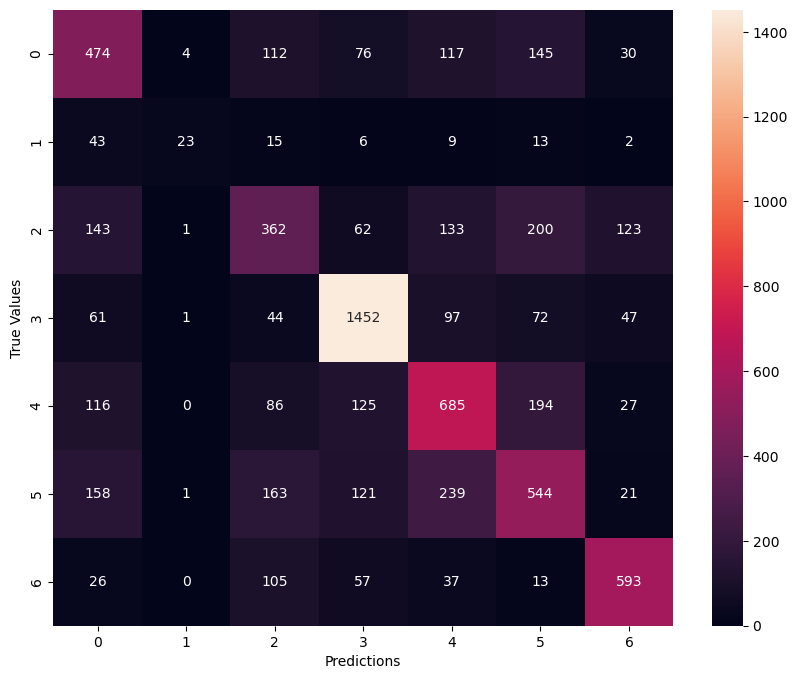

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [31]:
cm_emote05f = confusion_matrix(true_emote05f, pred_emote05f)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_emote05f, annot=True, fmt='g')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.show()
print(class_names)

In [32]:
ac_emote05f = accuracy_score(true_emote05f, pred_emote05f)
pres_emote05f = np.diagonal(cm_emote05f) / np.sum(cm_emote05f, axis=1)
pres_emote05f = list(pres_emote05f)
pres_emote05f.append(ac_emote05f)
f1_emote05f = f1_score(true_emote05f, pred_emote05f, average=None)
num_tests_emote05f = list(np.sum(cm_emote05f, axis=1))
num_tests_emote05f.append(np.sum(cm_emote05f))
print(ac_emote05f)
print(pres_emote05f)
print(f1_emote05f)
print(num_tests_emote05f)

0.5757871273335191
[0.49478079331941544, 0.2072072072072072, 0.353515625, 0.818489289740699, 0.5555555555555556, 0.4362469927826784, 0.7135980746089049, 0.5757871273335191]
[0.47902981 0.32624113 0.37885924 0.79063436 0.5372549  0.44810544
 0.70848268]
[958, 111, 1024, 1774, 1233, 1247, 831, 7178]


In [33]:
for i in range(8):
    for_pd['model'].append('05Focal200')
    for_pd['emotion'].append(emotions[i])
    for_pd['num_tests'].append(num_tests_emote05f[i])
    for_pd['test_acc'].append(pres_emote05f[i])

# ResNet50

In [34]:
resnet50 = K.models.load_model('ResNet50.h5')

In [35]:
true_resnet50 = []
pred_resnet50 = []

for x, y in testdataset:
    predictions = resnet50.predict(x)
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y.numpy(), axis=1)

    pred_resnet50.extend(pred_classes)
    true_resnet50.extend(true_classes)


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


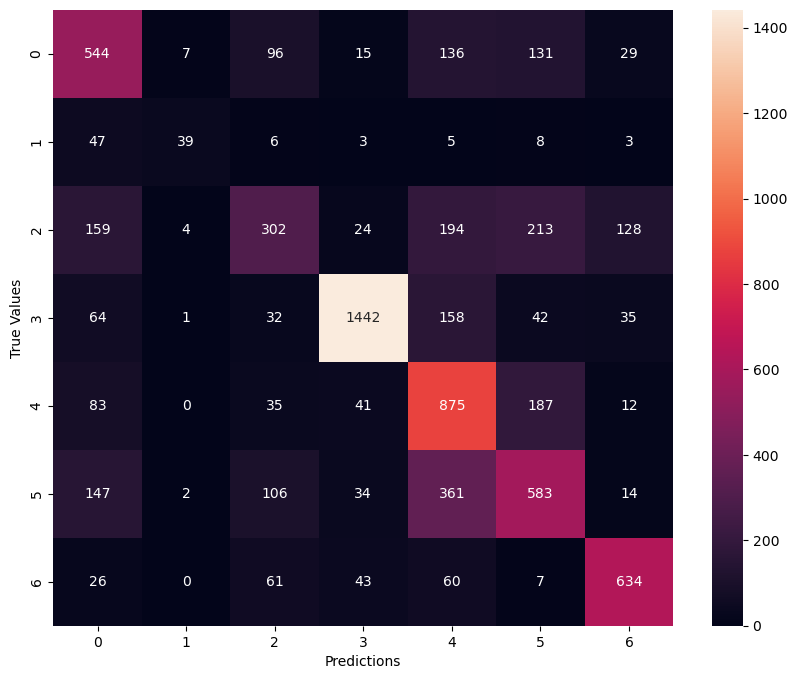

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [36]:
cm_resnet50 = confusion_matrix(true_resnet50, pred_resnet50)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_resnet50, annot=True, fmt='g')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.show()
print(class_names)

In [37]:
ac_resnet50 = accuracy_score(true_resnet50, pred_resnet50)
pres_resnet50 = np.diagonal(cm_resnet50) / np.sum(cm_resnet50, axis=1)
pres_resnet50 = list(pres_resnet50)
pres_resnet50.append(ac_resnet50)
f1_resnet50 = f1_score(true_resnet50, pred_resnet50, average=None)
num_tests_resnet50 = list(np.sum(cm_resnet50, axis=1))
num_tests_resnet50.append(np.sum(cm_resnet50))
print(ac_resnet50)
print(pres_resnet50)
print(f1_resnet50)
print(num_tests_resnet50)

0.6156310950125383
[0.5678496868475992, 0.35135135135135137, 0.294921875, 0.8128523111612176, 0.7096512570965126, 0.46752205292702487, 0.762936221419976, 0.6156310950125383]
[0.53648915 0.47560976 0.36341757 0.8542654  0.5790867  0.48221671
 0.75207592]
[958, 111, 1024, 1774, 1233, 1247, 831, 7178]


In [38]:
for i in range(8):
    for_pd['model'].append('ResNet50')
    for_pd['emotion'].append(emotions[i])
    for_pd['num_tests'].append(num_tests_resnet50[i])
    for_pd['test_acc'].append(pres_resnet50[i])

# Models Accuracy

In [39]:
# Putting all data together
data_acc = pd.DataFrame(for_pd)

In [40]:
data_acc.head(10)

,model,emotion,num_tests,test_acc
0,01cross,angry,958,0.558455
1,01cross,disgust,111,0.000000
2,01cross,fear,1024,0.237305
3,01cross,happy,1774,0.838782
4,01cross,neutral,1233,0.611517
5,01cross,sad,1247,0.521251
6,01cross,surprise,831,0.691937
7,01cross,total,7178,0.591390
8,01Focal200,angry,958,0.583507
9,01Focal200,disgust,111,0.414414


## Total

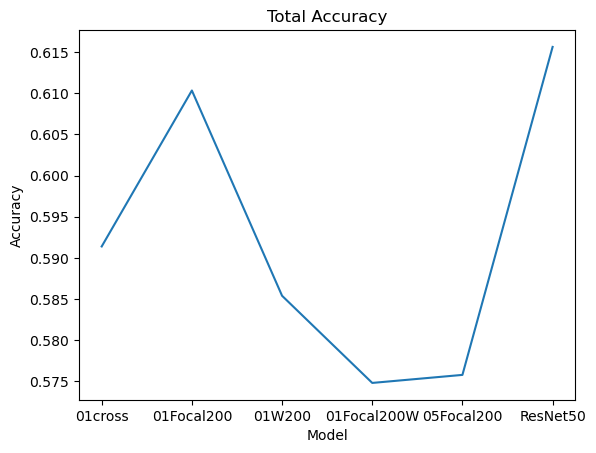

In [41]:
total = data_acc[data_acc['emotion'] == 'total']
plt.plot(total['model'], total['test_acc'])
plt.title('Total Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [52]:
total.sort_values('test_acc', ascending=False)

,model,emotion,num_tests,test_acc
47,ResNet50,total,7178,0.615631
15,01Focal200,total,7178,0.610337
7,01cross,total,7178,0.591390
23,01W200,total,7178,0.585400
39,05Focal200,total,7178,0.575787
31,01Focal200W,total,7178,0.574812


## Angry

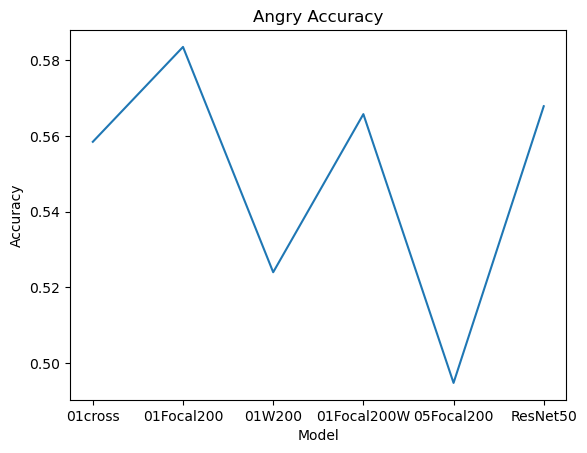

In [42]:
angry = data_acc[data_acc['emotion'] == 'angry']
plt.plot(angry['model'], angry['test_acc'])
plt.title('Angry Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [53]:
angry.sort_values('test_acc', ascending=False)

,model,emotion,num_tests,test_acc
8,01Focal200,angry,958,0.583507
40,ResNet50,angry,958,0.567850
24,01Focal200W,angry,958,0.565762
0,01cross,angry,958,0.558455
16,01W200,angry,958,0.524008
32,05Focal200,angry,958,0.494781


## Disgust

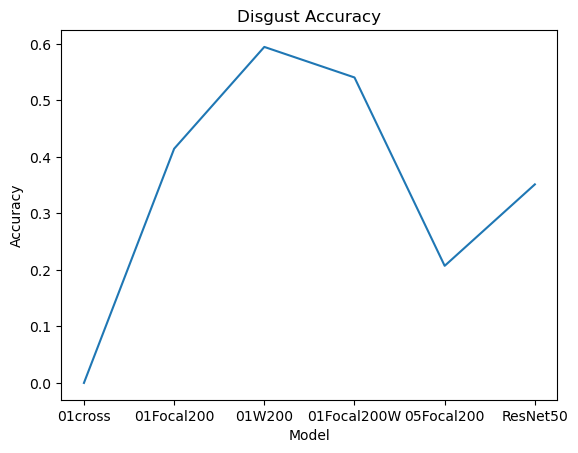

In [43]:
disgust = data_acc[data_acc['emotion'] == 'disgust']
plt.plot(disgust['model'], disgust['test_acc'])
plt.title('Disgust Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [54]:
disgust.sort_values('test_acc', ascending=False)

,model,emotion,num_tests,test_acc
17,01W200,disgust,111,0.594595
25,01Focal200W,disgust,111,0.540541
9,01Focal200,disgust,111,0.414414
41,ResNet50,disgust,111,0.351351
33,05Focal200,disgust,111,0.207207
1,01cross,disgust,111,0.000000


## Fear

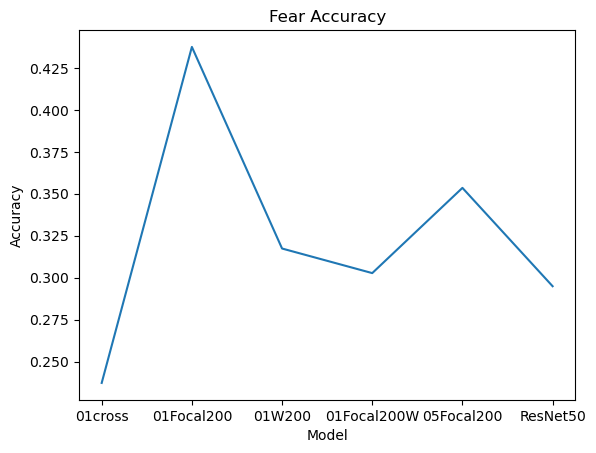

In [44]:
fear = data_acc[data_acc['emotion'] == 'fear']
plt.plot(fear['model'], fear['test_acc'])
plt.title('Fear Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [55]:
fear.sort_values('test_acc', ascending=False)

,model,emotion,num_tests,test_acc
10,01Focal200,fear,1024,0.437500
34,05Focal200,fear,1024,0.353516
18,01W200,fear,1024,0.317383
26,01Focal200W,fear,1024,0.302734
42,ResNet50,fear,1024,0.294922
2,01cross,fear,1024,0.237305


## Happy

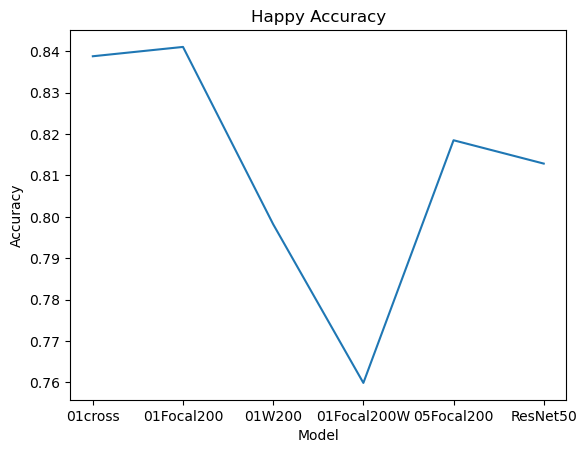

In [45]:
happy = data_acc[data_acc['emotion'] == 'happy']
plt.plot(happy['model'], happy['test_acc'])
plt.title('Happy Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [57]:
happy.sort_values('test_acc', ascending=False)

,model,emotion,num_tests,test_acc
11,01Focal200,happy,1774,0.841037
3,01cross,happy,1774,0.838782
35,05Focal200,happy,1774,0.818489
43,ResNet50,happy,1774,0.812852
19,01W200,happy,1774,0.798196
27,01Focal200W,happy,1774,0.759865


## Neutral

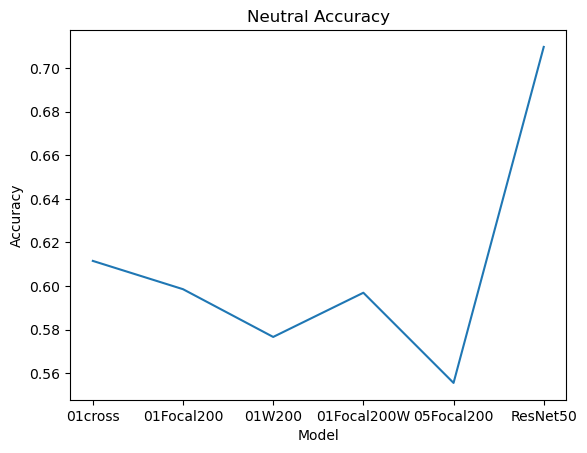

In [46]:
neutral = data_acc[data_acc['emotion'] == 'neutral']
plt.plot(neutral['model'], neutral['test_acc'])
plt.title('Neutral Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [58]:
neutral.sort_values('test_acc', ascending=False)

,model,emotion,num_tests,test_acc
44,ResNet50,neutral,1233,0.709651
4,01cross,neutral,1233,0.611517
12,01Focal200,neutral,1233,0.598540
28,01Focal200W,neutral,1233,0.596918
20,01W200,neutral,1233,0.576642
36,05Focal200,neutral,1233,0.555556


## Sad

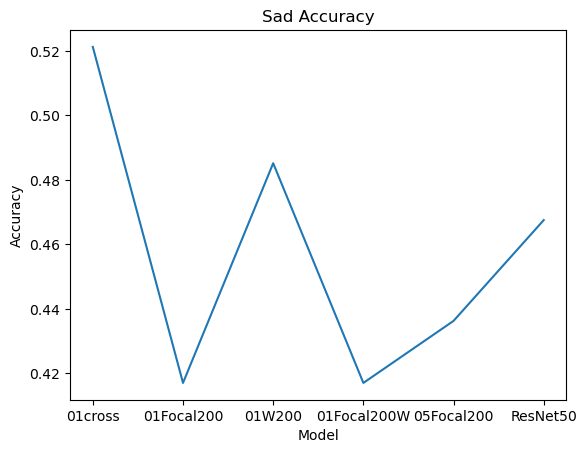

In [47]:
sad = data_acc[data_acc['emotion'] == 'sad']
plt.plot(sad['model'], sad['test_acc'])
plt.title('Sad Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [59]:
sad.sort_values('test_acc', ascending=False)

,model,emotion,num_tests,test_acc
5,01cross,sad,1247,0.521251
21,01W200,sad,1247,0.485164
45,ResNet50,sad,1247,0.467522
37,05Focal200,sad,1247,0.436247
13,01Focal200,sad,1247,0.417001
29,01Focal200W,sad,1247,0.417001


## Surprise

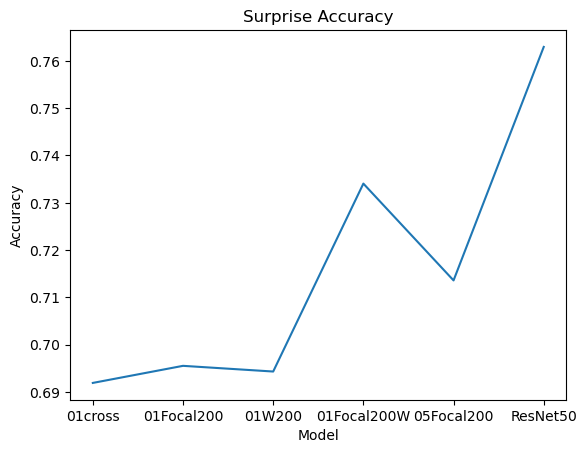

In [48]:
surprise = data_acc[data_acc['emotion'] == 'surprise']
plt.plot(surprise['model'], surprise['test_acc'])
plt.title('Surprise Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [60]:
surprise.sort_values('test_acc', ascending=False)

,model,emotion,num_tests,test_acc
46,ResNet50,surprise,831,0.762936
30,01Focal200W,surprise,831,0.734055
38,05Focal200,surprise,831,0.713598
14,01Focal200,surprise,831,0.695548
22,01W200,surprise,831,0.694344
6,01cross,surprise,831,0.691937
